In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hr_data = pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


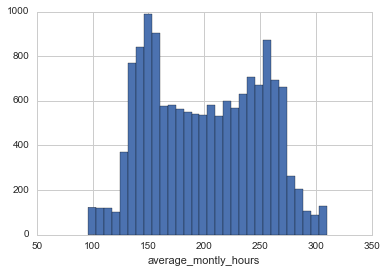

In [6]:
sns.set_style('whitegrid')
hr_data['average_montly_hours'].hist(bins=30)
plt.xlabel('average_montly_hours')

In [7]:
cat_salary = ['salary']
final_data = pd.get_dummies(hr_data,columns=cat_salary,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary_low               14999 non-null uint8
salary_medium            14999 non-null uint8
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 1.1+ MB


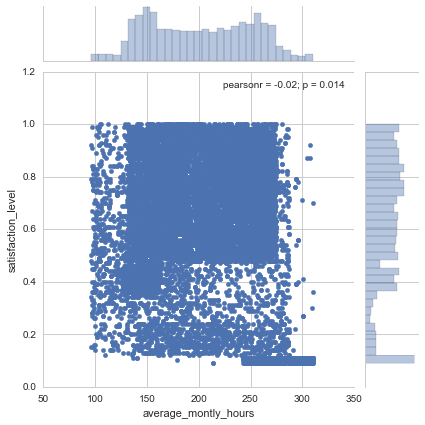

In [8]:
sns.jointplot(x='average_montly_hours',y='satisfaction_level',data=final_data)

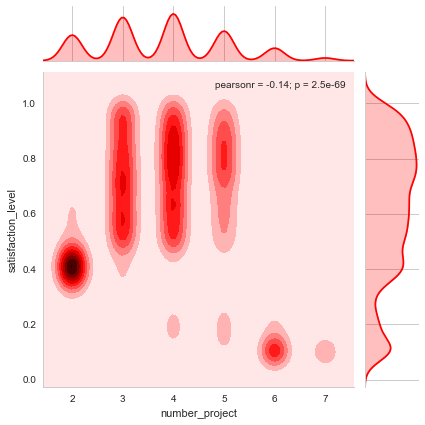

In [9]:
sns.jointplot(x='number_project',y='satisfaction_level',data=final_data,color='red',kind='kde');

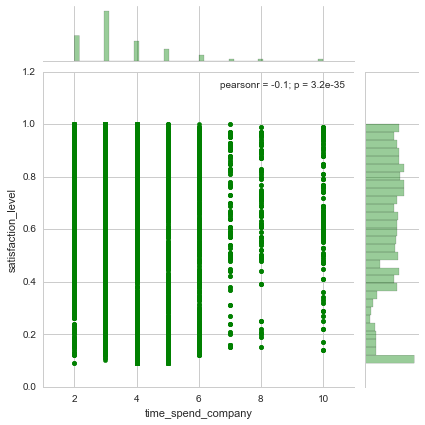

In [10]:
sns.jointplot(x='time_spend_company',y='satisfaction_level',data=final_data,color='green')

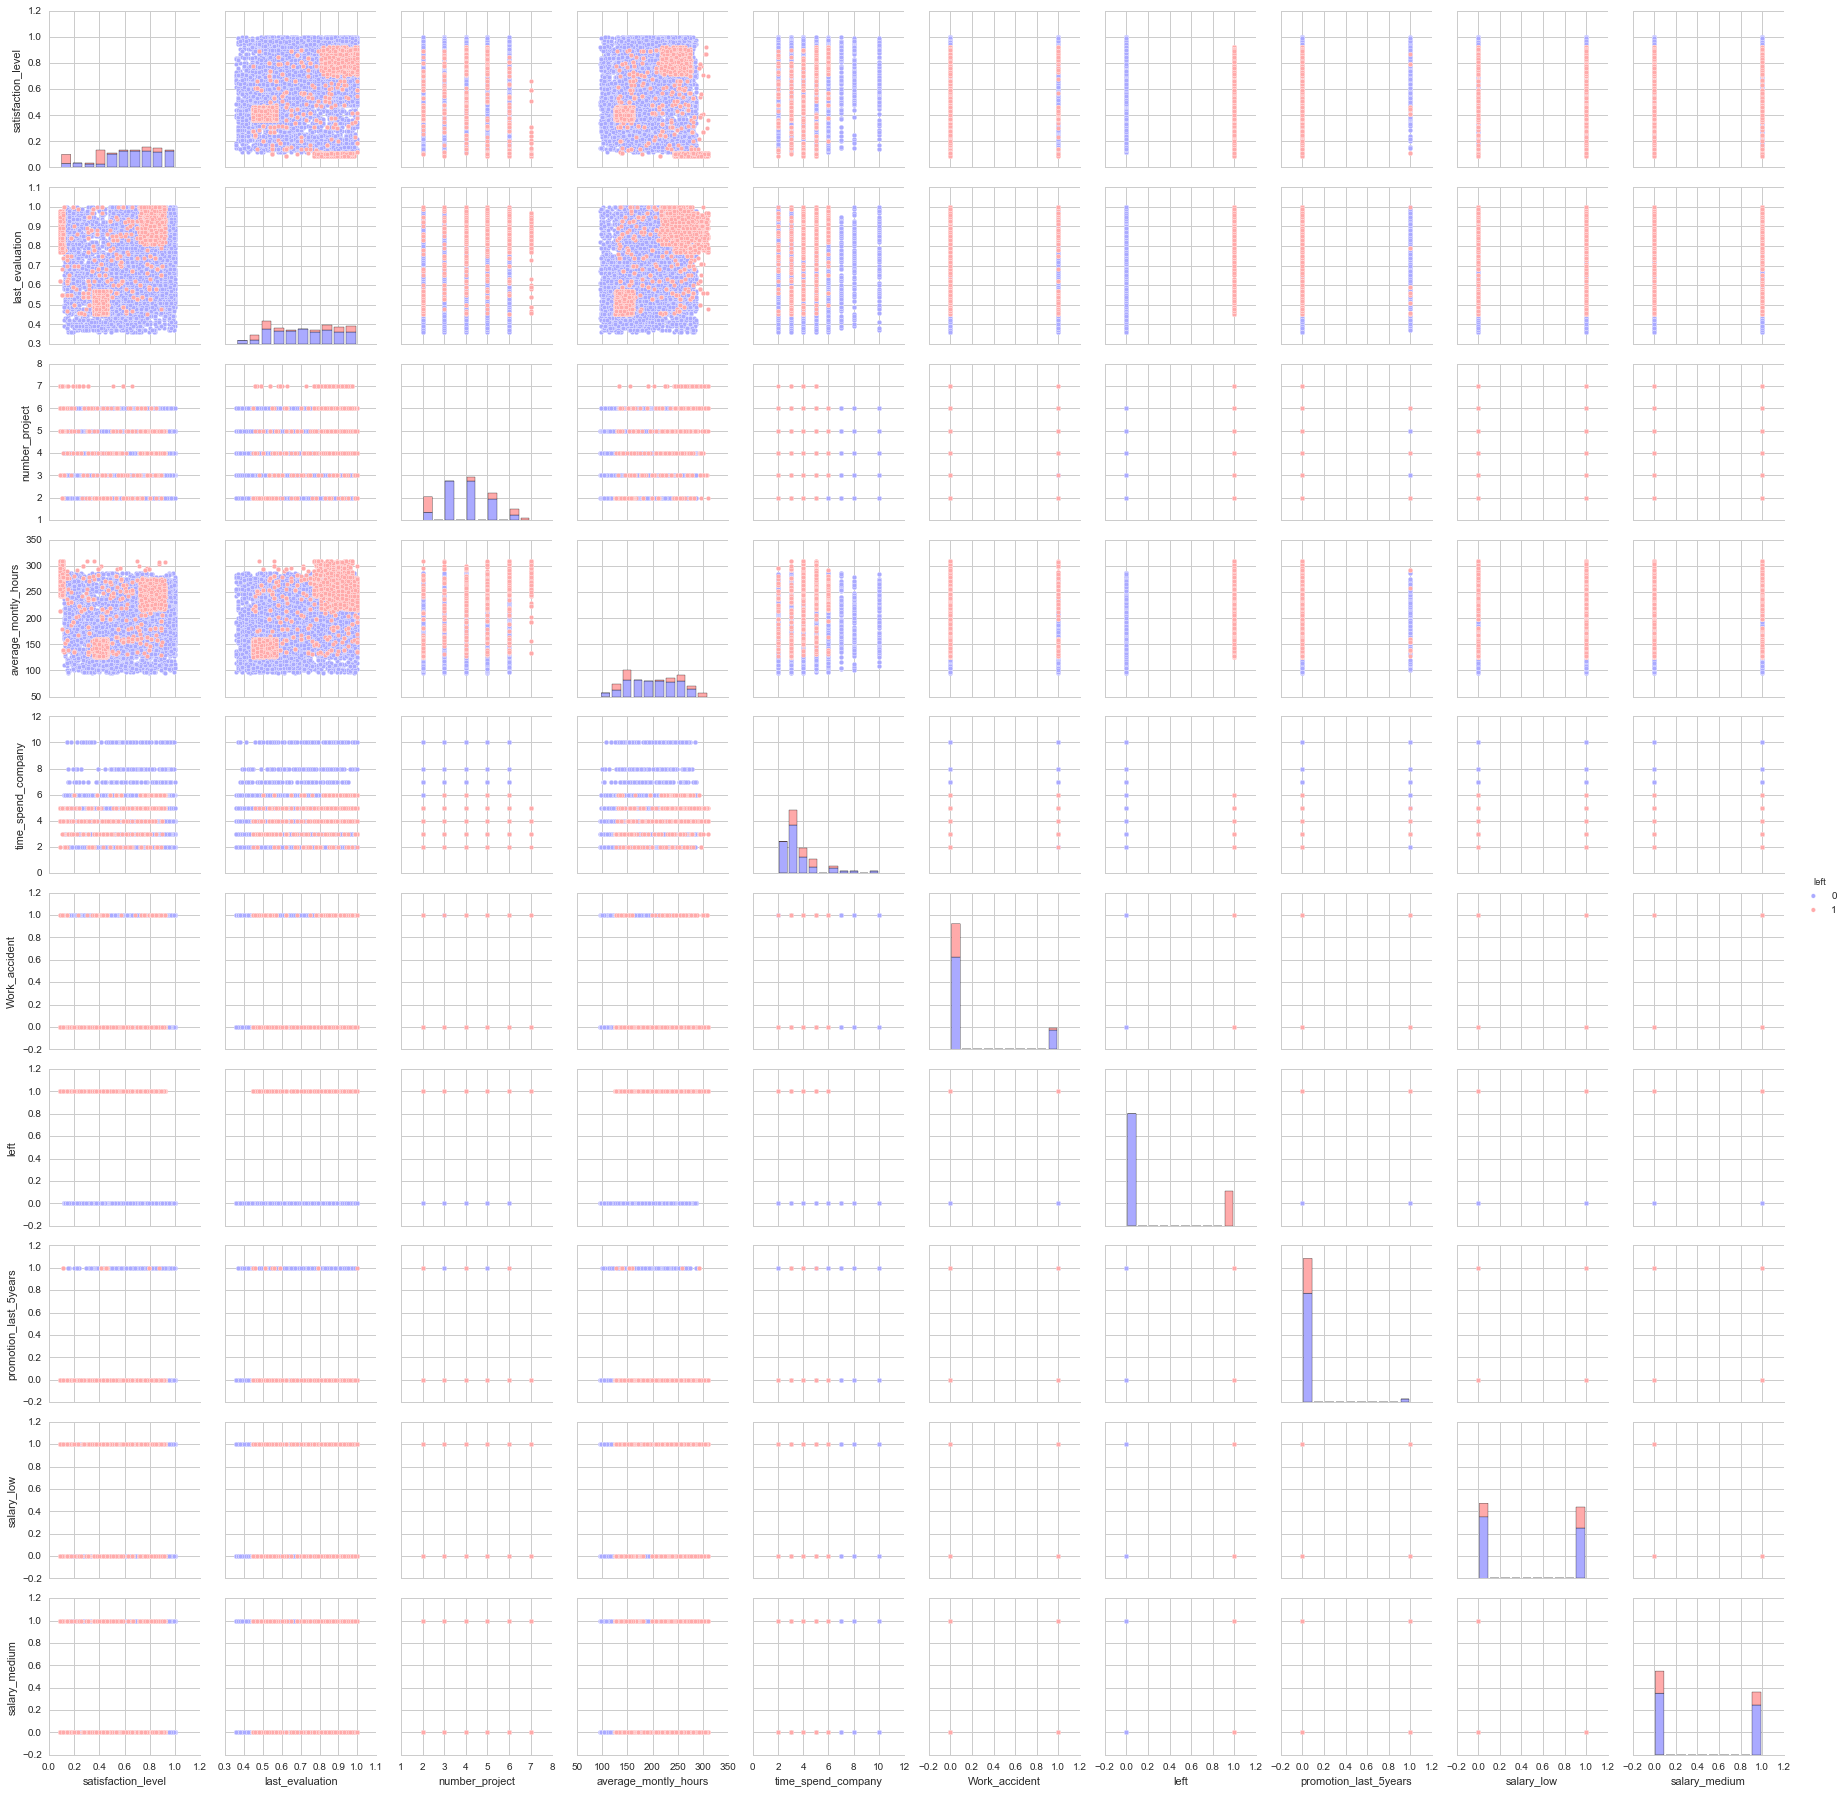

In [11]:
sns.pairplot(final_data,hue='left',palette='bwr')

# Logistic Regression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = final_data.drop(['left','sales'], axis=1)
y = final_data['left']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87      3770
          1       0.59      0.34      0.43      1180

avg / total       0.76      0.79      0.76      4950



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,predictions)

array([[3490,  280],
       [ 784,  396]])

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [1]:
dtree = DecisionTreeClassifier()

NameError: name 'DecisionTreeClassifier' is not defined